### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [73]:
import numpy as np

mean_row = np.zeros((3,1))
mean_column = np.zeros((1,4))
mean_overall = np.zeros((1,1))

m = np.arange(12).reshape((3,4))

# Row mean
one = np.ones((4,1))
mean_row = (m.dot(one))/4

# Column mean
one = np.ones((3,1))
mean_column = (np.transpose(m).dot(one))/3

# Overall mean
mean = ((np.ones((1,4))).dot(mean_column*3))/12

print("Row mean: \n",mean_row)
print("Column mean: \n", mean_column)
print("Overall mean: \n", mean)

Row mean: 
 [[1.5]
 [5.5]
 [9.5]]
Column mean: 
 [[4.]
 [5.]
 [6.]
 [7.]]
Overall mean: 
 [[5.5]]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [74]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# Outer product 1
outer_1 = np.outer(u,v)

# Outer product 2
list_2 = [x*y for x in u for y in v]
outer_2 = (np.array(list_2)).reshape(4,4)

# Outer product 3
outer_3 = u.reshape(4,1)*v.reshape(1,4)

print("Outer product in the first way:\n", outer_1)
print("Outer product in the second way:\n", outer_2)
print("Outer product in the third way:\n", outer_3)

Outer product in the first way:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product in the second way:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product in the third way:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [75]:
rand_mat = np.random.random_sample((10, 6))

mask = (rand_mat < 0.1)
row_mask = np.any(mask, axis=1)
rand_mat[row_mask] = 0

print(rand_mat)

[[0.         0.         0.         0.         0.         0.        ]
 [0.69987298 0.7568769  0.36132311 0.52673741 0.36602153 0.31990302]
 [0.67061938 0.9403369  0.44941978 0.55270074 0.71887315 0.72241628]
 [0.6496528  0.80192244 0.32060184 0.18351197 0.34315374 0.31789452]
 [0.         0.         0.         0.         0.         0.        ]
 [0.86436528 0.65116971 0.27750623 0.30656764 0.70413422 0.21101742]
 [0.58127483 0.7075042  0.43307846 0.24234809 0.76027234 0.41388451]
 [0.25758675 0.85745159 0.46308909 0.22801007 0.13668768 0.2639085 ]
 [0.23040142 0.66527263 0.61002917 0.13573223 0.54025625 0.66802556]
 [0.49308771 0.34963815 0.41093052 0.40270446 0.37992874 0.2831678 ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

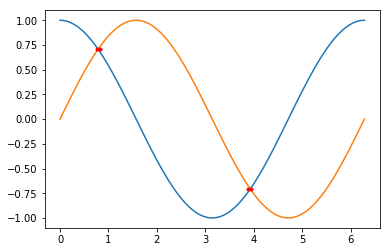

In [76]:
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 100)
extract_10 = x[0:100:10]
reverse = x[::-1]
mask = (abs(np.sin(x)-np.cos(x))<0.1)
extract_diff = x[mask]
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

# Plot points where the absolute difference between the sin and the cosine function is less than 0.1
# Plot the mean value at this point
plt.plot(extract_diff, (np.cos(extract_diff) + np.sin(extract_diff))/2,'r.')

plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [244]:
lin = np.arange(1, 11)
matrix_10_x_10 = lin.reshape((1,-1))*lin.reshape((-1,1))
trace = np.trace(matrix_10_x_10)
reverse_mat = np.fliplr(matrix_10_x_10)
anti_diag = np.diag(reverse_mat)

# Create a mask to reduce the matrix and then get it diagonal
mask = np.full((10,10), True)
mask[:,0] = False
mask[9,:] = False
mat = matrix_10_x_10[mask].reshape((9,9))
result = np.diag(mat)

print("Trace:",trace)
print("Anti-Diagonal:",anti_diag)
print("Diagonal with offset:",result)


Trace: 385
Anti-Diagonal: [10 18 24 28 30 30 28 24 18 10]
Diagonal with offset: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [77]:
mile_to_km = 1.60934
name_city = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
distances_mile = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]).reshape((-1,1))
grid_2D_mile = abs(distances_mile.T - distances_mile)
grid_2D_km = grid_2D_mile*mile_to_km
print("\nMiles 2D Grid:\n")
print(grid_2D_mile)
print("\nKilometres 2D Grid:\n")
print(grid_2D_km)


Miles 2D Grid:

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Kilometres 2D Grid:

[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 1300.

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

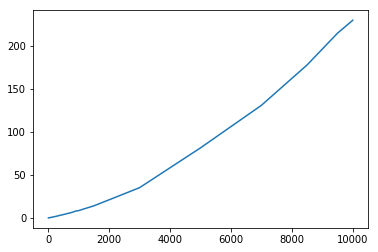

Prime numbers are: [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
Prime numbers are: [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


In [189]:
def prime_num(max_num):
    num_array = np.arange(max_num)
    for i in range(2, max_num):
        mask_1 = (num_array == i)
        mask_2 = (num_array % i != 0)
        mask = (mask_1 + mask_2)
        num_array = num_array[mask]
    return num_array

def prime_num_sieve(n):
    num = np.arange(n)
    A = np.full(n, True)
    for i in range(2, int(n**(1/2))):
        if A[i] == True:
            j = [i**2 + x*i for x in num if (i**2+x*i) < n]
            A[j] = False
    return num[A]
    
prime = prime_num(100)
prime_sieve = prime_num_sieve(100)
N = np.array([10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,5000,7000,8500,9500,10000])
t = np.array([0.056,0.329,0.679,1.45,2.23,3.15,3.93,4.88,5.72,6.65,7.97,8.57,14.1,21.1,35.2,81.5,131,178,215,230])
plt.plot(N,t)
plt.show()

# The algorithm scale as N*loglog(N)
print("Prime numbers are:", prime)
print("Prime numbers are:", prime_sieve)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

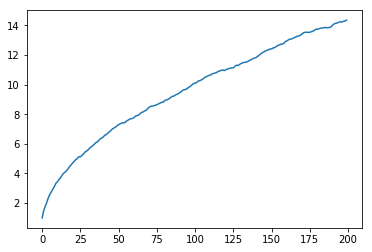

In [190]:
import numpy.random as npr

# Create the initial maatrix 
array_2D = npr.randint(0,2,size=(1000,200))
array_2D[array_2D == 0] = -1

# Calculate actual distance from the origin at each step
column = array_2D[:,0].reshape((-1,1))
for i in range(1,array_2D.shape[1]):
    column = column + array_2D[:,i].reshape((-1,1))
    array_2D[:,i] = column.flatten()

array_2D_square = array_2D**2
one = 1/array_2D_square.shape[0]*np.ones((array_2D_square.shape[0],1))
distance_square_mean = (array_2D_square.T).dot(one)
distance_mean = distance_square_mean**(1/2)

plt.plot(np.arange(distance_mean.shape[0]),distance_mean)
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

*Exercise*: write an algorithm that determins and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

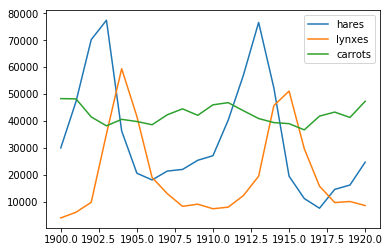


Hares: DescribeResult(nobs=21, minmax=(7600.0, 77400.0), mean=34080.95238095238, variance=458558619.04761904, skewness=0.8707926603586706, kurtosis=-0.4713852285780282)

Lynxes: DescribeResult(nobs=21, minmax=(4000.0, 59400.0), mean=20166.666666666668, variance=277422333.3333333, skewness=1.122094055331874, kurtosis=-0.11206718692648243)

Carrots: DescribeResult(nobs=21, minmax=(36700.0, 48300.0), mean=42400.0, variance=11591000.0, skewness=0.328696845915367, kurtosis=-0.9133000711768431)


In [227]:
from scipy import stats

# Open file and load the matrix
mat = np.loadtxt('populations.txt')
year = mat[:,0]
hares = mat[:,1]
lynxes = mat[:,2]
carrots = mat[:,3]

plt.plot(year, hares, label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.legend()
plt.show()

print("\nHares:", stats.describe(hares))
print("\nLynxes:", stats.describe(lynxes))
print("\nCarrots:", stats.describe(carrots))

From the graph we can see that in average the carrots have the highest population each year. I think that there is a correlation between hares and lynxes as said in the studies linked above.